# Plot dos resultados

In [13]:
import seaborn as sns
import pandas as pd
import wittgenstein as lw
from sklearn import metrics

results = pd.read_csv("./results/Drebin215-results.csv", index_col=0)
results.head()

,n_fold,k,score_function,algorithm,accuracy,precision,recall,f-measure
0,0,10,chi2,NaiveBayes,0.802527,0.797617,0.823660,0.797233
1,0,10,chi2,KNN,0.640293,0.745595,0.719027,0.638531
2,0,10,chi2,RandomForest,0.835771,0.860446,0.783682,0.803310
3,0,10,chi2,LogisticRegression,0.825133,0.854554,0.767956,0.787777
4,0,10,chi2,DecisionTree,0.833777,0.858992,0.780889,0.800533


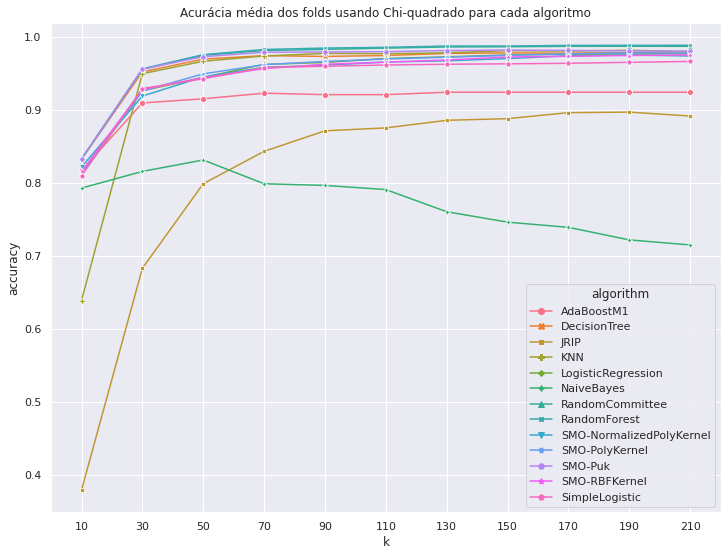

In [7]:
def plot_algorithms_results(results, title, score_function='chi2', metric='accuracy'):
    g = sns.lineplot(x='k', y=metric, hue='algorithm',
                    data=results[results['score_function'] == score_function].groupby(['k','algorithm']).mean(),
                    markers=True, style='algorithm', dashes=False)
    g.set_title(title)
    g.set_xticks(results['k'].unique())

sns.set(rc={'figure.figsize':(12,9)})

plot_algorithms_results(results, 'Acurácia média dos folds usando Chi-quadrado para cada algoritmo')

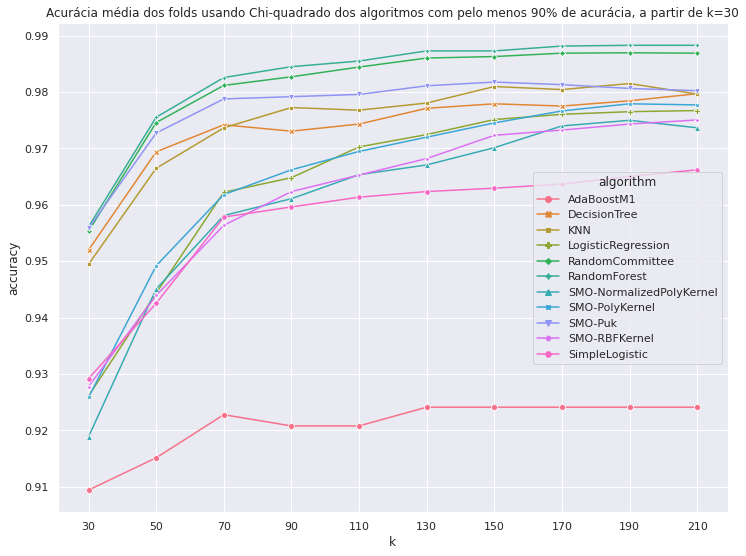

In [8]:
plot_algorithms_results(results[(~results['algorithm'].isin(['NaiveBayes', 'JRIP'])) & (results['k'] >= 30)], 
                        'Acurácia média dos folds usando Chi-quadrado dos algoritmos com pelo menos 90% de acurácia, a partir de k=30')

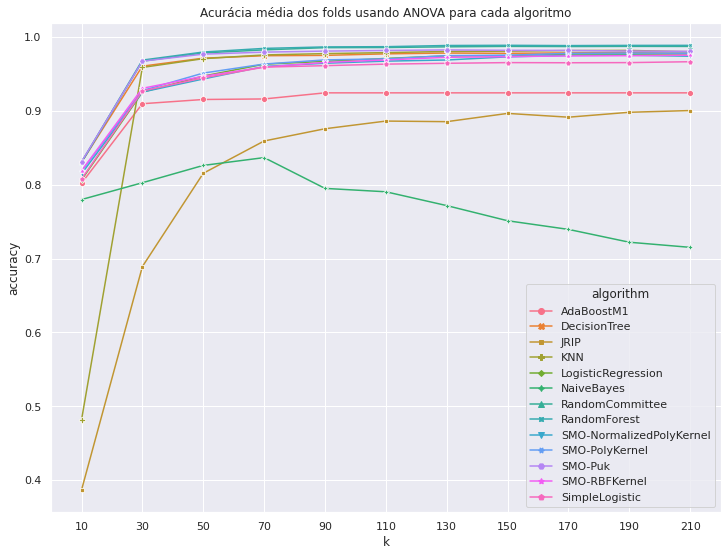

In [9]:
plot_algorithms_results(results, 'Acurácia média dos folds usando ANOVA para cada algoritmo', score_function='f_classif')

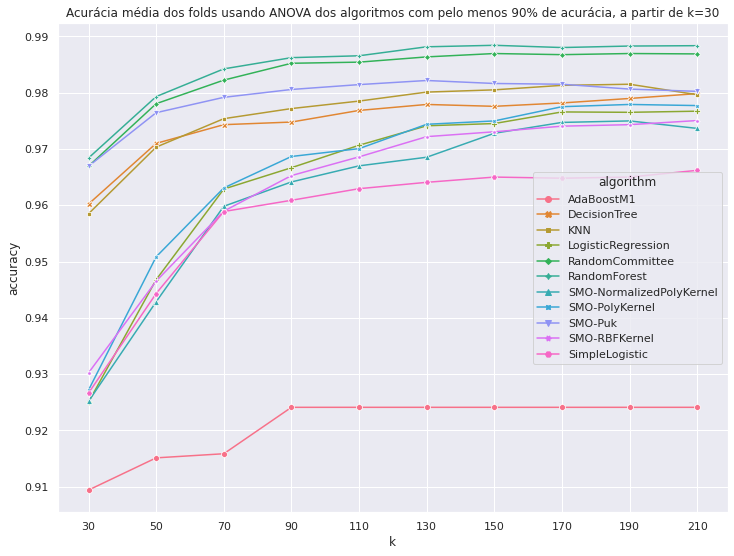

In [10]:
plot_algorithms_results(results[(~results['algorithm'].isin(['NaiveBayes', 'JRIP'])) & (results['k'] >= 30)], 
                        'Acurácia média dos folds usando ANOVA dos algoritmos com pelo menos 90% de acurácia, a partir de k=30',
                        score_function='f_classif')

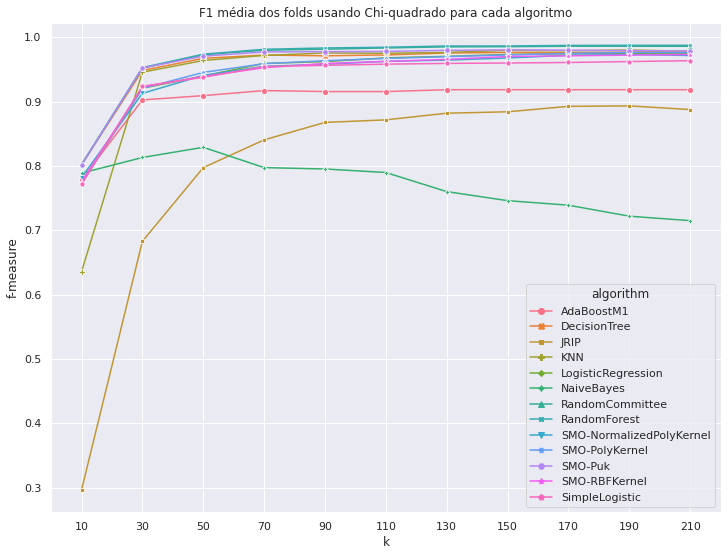

In [11]:
plot_algorithms_results(results, 'F1 média dos folds usando Chi-quadrado para cada algoritmo', metric='f-measure')

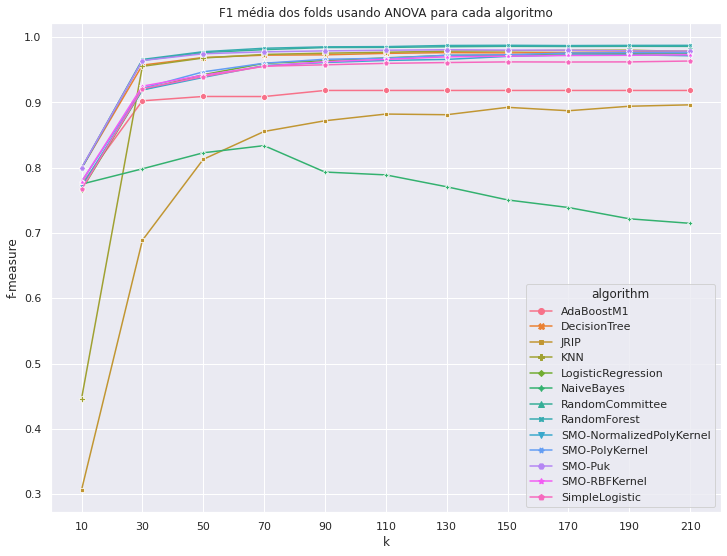

In [12]:
plot_algorithms_results(results, 'F1 média dos folds usando ANOVA para cada algoritmo', score_function='f_classif', metric='f-measure')